In [1]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=434ece603c538b4042b7ffc2d0f8093204d05a67befd1fbc9b69d5e0ab135408
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
cd "/content/gdrive/My Drive/"

/content/gdrive/My Drive


In [4]:
!pwd

/content/gdrive/My Drive


In [5]:
!pip install scikit-image

In [6]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
import cv2
from google.colab.patches import cv2_imshow

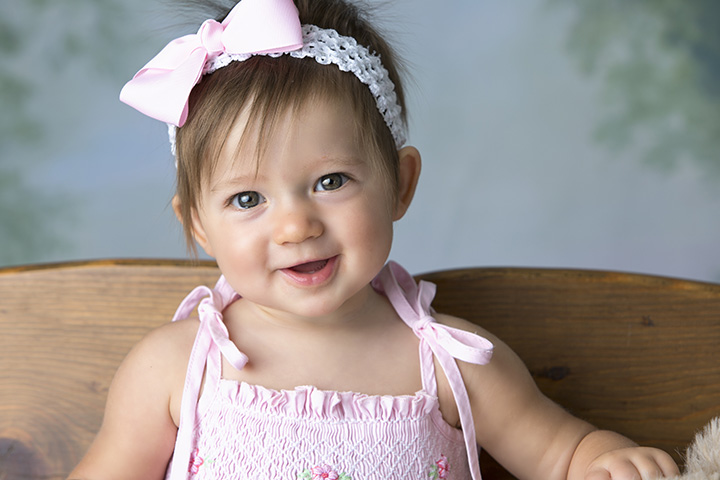

None


In [29]:
image=cv2.imread('/content/Nice-And-Beautiful-Baby-Girl-Names-With-Meanings.jpg')
print(cv2_imshow(image))

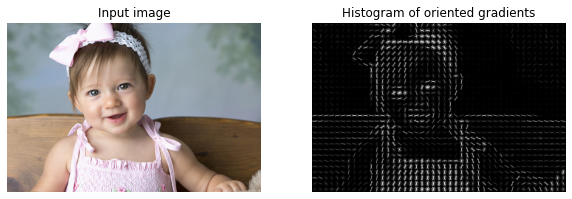

In [32]:
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
fd, hog_image=hog(image,orientations=8,pixels_per_cell=(16,16),
                  cells_per_block=(1,1),visualize=True,multichannel=True)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4),sharex=True,sharey=True)

ax1.axis('off')
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title('Input image')

hog_image_rescaled=exposure.rescale_intensity(hog_image,in_range=(0,10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled,cmap=plt.cm.gray)
ax2.set_title('Histogram of oriented gradients')
plt.show()


In [33]:
len(fd)

10800

In [10]:
image.shape

(480, 720, 3)

**Face** **Detection**

In [11]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

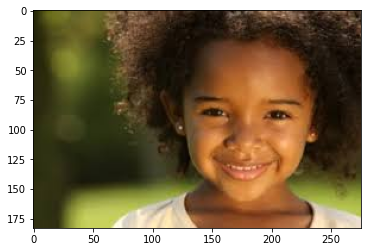

In [12]:
image=cv2.imread('/content/girl.jfif')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [13]:
face_locations=face_recognition.face_locations(image)
number_of_faces=len(face_locations)
print("Found {} face(s) in input range.".format(number_of_faces))

Found 1 face(s) in input range.


A face is located at pixel location Top: 127,left= 56,Bottom: 235,Right: 163


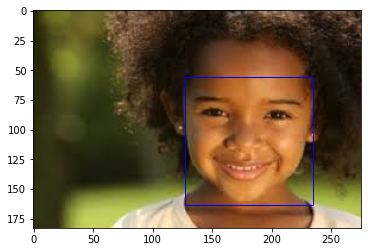

In [14]:
plt.imshow(image)
ax=plt.gca()
for face_location in face_locations:
  top,right,bottom,left=face_location
  x,y,w,h=left,top,right,bottom
  print("A face is located at pixel location Top: {},left= {},Bottom: {},Right: {}".format(x,y,w,h))

  rect=Rectangle((x,y),w-x,h-y,fill=False,color='Blue')
  ax.add_patch(rect)

plt.show()

**Face** **Recognition**

In [15]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

In [17]:
image=cv2.imread('/content/Bill-Gates.jpg')
bill=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image=cv2.imread('/content/barack-obama.jpg')
obama=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image=cv2.imread('/content/mandela.jpg')
mandela=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


In [19]:
bill_encoding=face_recognition.face_encodings(bill)[0]
obama_encoding=face_recognition.face_encodings(obama)[0]
mandela_encoding=face_recognition.face_encodings(mandela)[0]

known_face_encodings= [
        bill_encoding,
        obama_encoding,
        mandela_encoding               
]

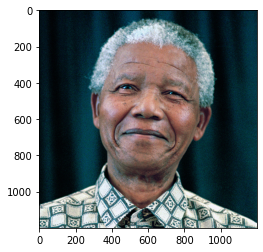

In [38]:
image=cv2.imread('/content/mandela.jpg')
unknown_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)

unknown_face_encodings=face_recognition.face_encodings(unknown_image)

In [24]:
from scipy.spatial import distance

for unknown_face_encoding in unknown_face_encodings:
  results=[]
  for known_face_encoding in known_face_encodings:
    d=distance.euclidean(known_face_encoding,unknown_face_encoding)
    results.append(d)
  threshold=0.6
  results=np.array(results) <=threshold

  name="Unknown"

  if results[0]:
    name="Bill Gates"
  elif results[1]:
    name="Barack Obama"
  elif results[2]:
    name="Nelson Mandela"
  
  print(f"Found {name} in the photo!")


Found Nelson Mandela in the photo!


Facial landmark

In [39]:
face_landmarks_list= face_recognition.face_landmarks(image)

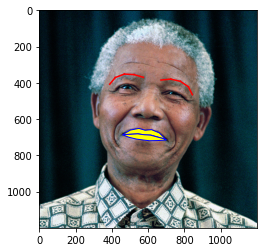

In [41]:
import matplotlib.lines as mlines
from matplotlib.patches import Polygon
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
ax=plt.gca()

for face_landmarks in face_landmarks_list:
  left_eyebrow_pts = face_landmarks['left_eyebrow']
  pre_x,pre_y = left_eyebrow_pts[0]
  for (x,y) in left_eyebrow_pts[1:]:
    l=mlines.Line2D([pre_x,x], [pre_y,y], color="red")
    ax.add_line(l)
    pre_x,pre_y=x,y
    
  right_eyebrow_pts = face_landmarks['right_eyebrow']
  pre_x,pre_y = right_eyebrow_pts[0]
  for (x,y) in right_eyebrow_pts[1:]:
    l=mlines.Line2D([pre_x,x], [pre_y,y], color="red")
    ax.add_line(l)
    pre_x,pre_y=x,y

  p=Polygon(face_landmarks['top_lip'], facecolor='yellow', edgecolor='blue')
  ax.add_patch(p)
  p=Polygon(face_landmarks['bottom_lip'], facecolor='yellow', edgecolor='blue')
  ax.add_patch(p)

plt.show()

  